Datasets: https://www.kaggle.com/c/titanic

In this notebook, I'll do some machine learning, which is predicting on test dataset if a passenger will die or not. This notebook split into 4 parts:
1. Import Module & Preview Data
2. Cleaning Data
3. Exploratory Analysis with Visualization
4. Machine Learning Modelling

### 1. Import Module & Preview Data 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
import sklearn
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Create a copy
df = train_df.copy(deep=True)
data_cleaner = [test_df, df]

print(train_df.info())
train_df.sample(5)

# For columns explanation, checks on https://www.kaggle.com/c/titanic/data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.000,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.750,F38,Q
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.900,NaN,S


### 2. Cleaning Data 

In [3]:
print('Train data columns with missing values:\n', df.isnull().sum(), '\n')
print('Test data columns with missing values:\n', test_df.isnull().sum())

train_df.describe(include='all')

Train data columns with missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test data columns with missing values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Silvey, Mrs. William Baird (Alice Munger)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**2.1 Missing Values**

In [4]:
# Dealing with missing values in train and test dataset
for dataset in data_cleaner:
    
    # Fill age and fare with median, embarked with mode
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Delete unnecessary features/columns
drop_col = ['PassengerId', 'Ticket', 'Cabin']
df.drop(columns=drop_col, inplace=True)

# Check missing values
print(df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


**2.2 Feature Engineering**

In [5]:
# Feature engineering for train and test dataset
for dataset in data_cleaner:
    
    # Merge sibling and parents to family
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    # Create IsAlone column and update to 0 if FamilySize > 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    # Create Title column with str.split
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    # Create FareBin column using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    # Create AgeBin column using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    # Difference of cut & qcut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

# Replacing title with less than 10 values with 'Misc'
title_misc = (df['Title'].value_counts() < 10)
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_misc.loc[x] == True else x)

print(df['Title'].value_counts())
df.sample(5)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
579,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,7.9250,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
237,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,26.2500,S,3,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
310,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,83.1583,C,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
164,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,39.6875,S,6,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
463,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


**2.3 Convert Formats**

In [6]:
# We'll use label encoder to convert objects to category
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = le.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = le.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = le.fit_transform(dataset['Title'])
    dataset['FareBin_Code'] = le.fit_transform(dataset['FareBin'])
    dataset['AgeBin_Code'] = le.fit_transform(dataset['AgeBin'])

In [7]:
# Define target variable
Target =['Survived']

# Create 4 columns list

# Original features
df_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
df_xy = Target + df_x
print('Original X Y: ', df_xy, '\n')

# Bin features to remove continuous variables
df_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
df_xy_bin = Target + df_x_bin
print('Bin X Y: ', df_xy_bin, '\n')

# Dummy variables from original features
df_dummy = pd.get_dummies(df[df_x])
df_x_dummy = df_dummy.columns.tolist()
df_xy_dummy = Target + df_x_dummy
print('Dummy X Y: ', df_xy_dummy, '\n')

# For algorithm calculation
df_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']

df_dummy.head(5)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


**2.4 Double Check Cleaned Data**

In [8]:
print('Train columns with null values: \n', df.isnull().sum(), '\n')
print(df.info(), '\n')

print('Test columns with null values: \n', test_df.isnull().sum(), '\n')
print (test_df.info(), '\n')

train_df.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
FareBin_Code     0
AgeBin_Code      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Silvey, Mrs. William Baird (Alice Munger)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**2.5 Split to Train & Test Data**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df_x_calc], df[Target], random_state=0)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(df[df_x_bin], df[Target], random_state=0)
#X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(df[df_x_dummy], df[Target], random_state=0)

### 3. Exploratory Analysis with Visualization 

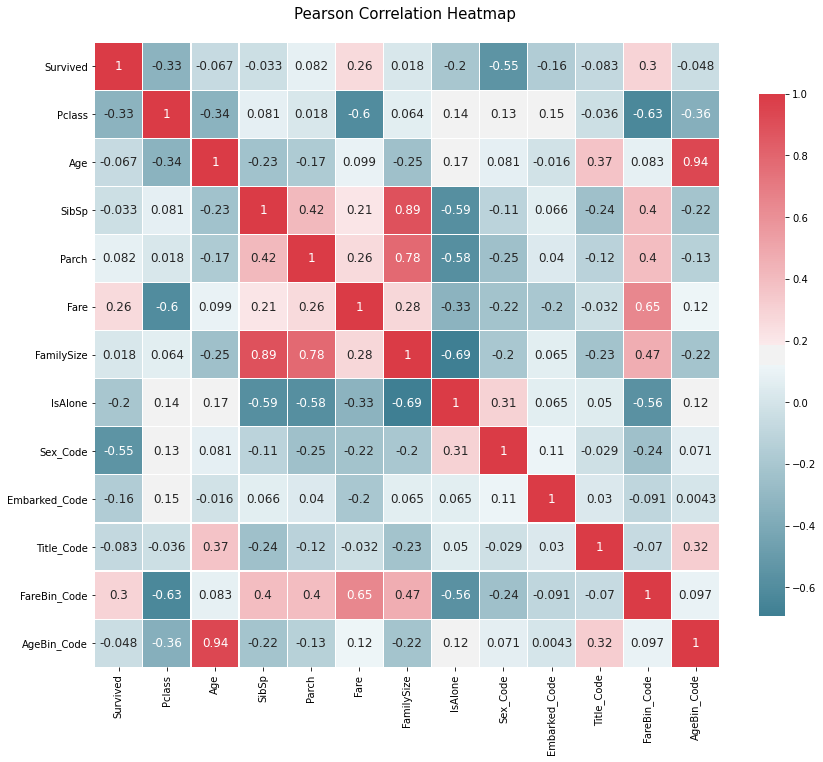

In [33]:
def correlation_heatmap(df):
    plt.figure(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(df.corr(), cmap=colormap, square=True, annot=True,
                cbar_kws={'shrink': .8}, annot_kws={'fontsize': 12},
                linewidths=0.1, vmax=1.0, linecolor='white')
    plt.title('Pearson Correlation Heatmap \n', size=15)
    
correlation_heatmap(df)

From the heatmap above, there are several correlation should be ignored (e.g between FamilySize and SibSp which is a product of it). We don't need to analyze the heatmap too much, as we only use it for reference of our next analysis.

Text(0, 0.5, 'Family Size (#)')

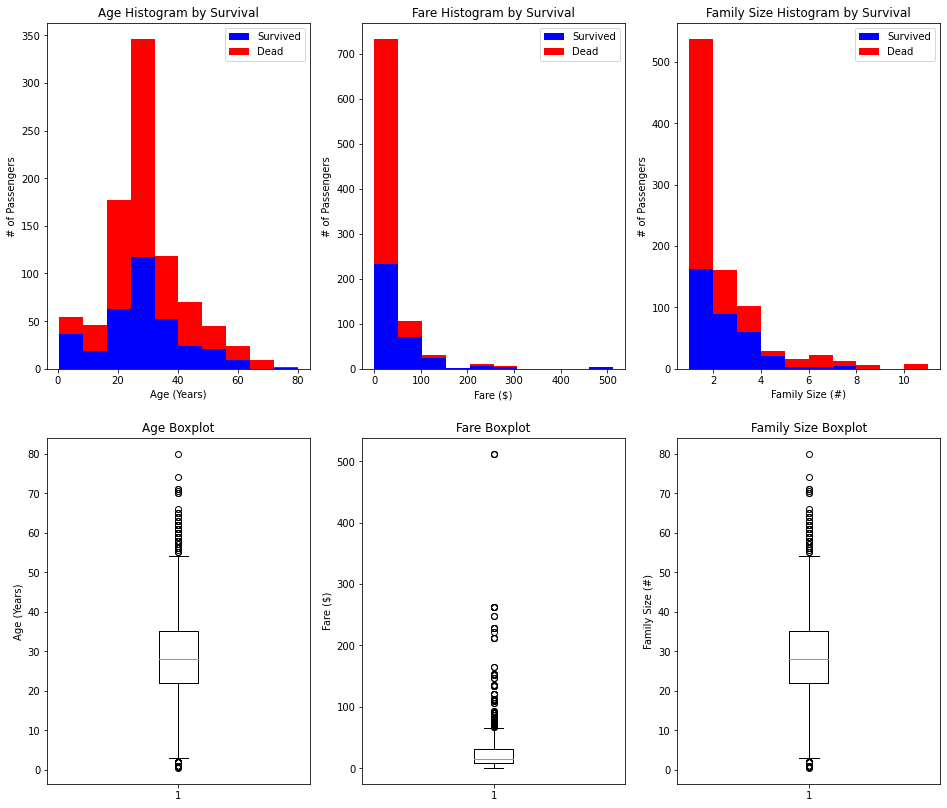

In [11]:
plt.figure(figsize=(16,14))

plt.subplot(231)
plt.hist(x=[df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], stacked=True,
         color=['b', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(232)
plt.hist(x=[df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], stacked=True,
         color=['b', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(233)
plt.hist(x=[df[df['Survived'] == 1]['FamilySize'], df[df['Survived'] == 0]['FamilySize']], stacked=True,
         color=['b', 'r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(234)
plt.boxplot(df['Age'], meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(235)
plt.boxplot(df['Fare'], meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(236)
plt.boxplot(df['Age'], meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

The values with 500$ Fare is definitely an outlier and will reduce our model's accuracy later. So we'll delete the row correspond to it.

In [12]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin',
       'Sex_Code', 'Embarked_Code', 'Title_Code', 'FareBin_Code',
       'AgeBin_Code'],
      dtype='object')

In [13]:
# Check the outlier & drop it
df = df.drop(df[df['Fare'] == 512.3292].index)

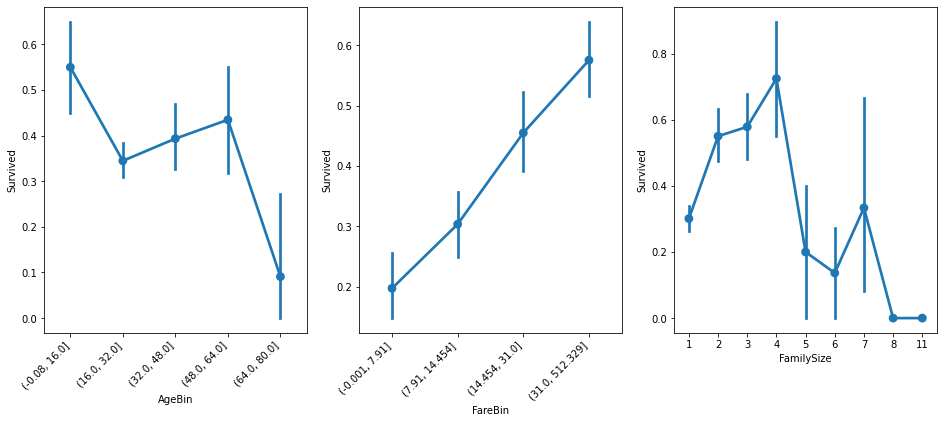

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
_ = sns.pointplot(x='AgeBin', y='Survived', data=df, ax=ax[0])
_.set_xticklabels(_.get_xticklabels(), rotation=45, horizontalalignment='right')
_ = sns.pointplot(x='FareBin', y='Survived', data=df, ax=ax[1])
_.set_xticklabels(_.get_xticklabels(), rotation=45, horizontalalignment='right')
_ = sns.pointplot(x='FamilySize', y='Survived', data=df, ax=ax[2])

As age or family size increased, they less likely to survive the Titanic disaster. What's more interesting is the more expensive the ticket, they have higher proportion of people survived. Could it be that they had bigger priority from cabin crews when disaster emergency happened? Also, note that higher Passenger Class could be caused by higher fare so we'll check it next.

Note: Corr coef 'Fare' vs 'Survived' is 0.26 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

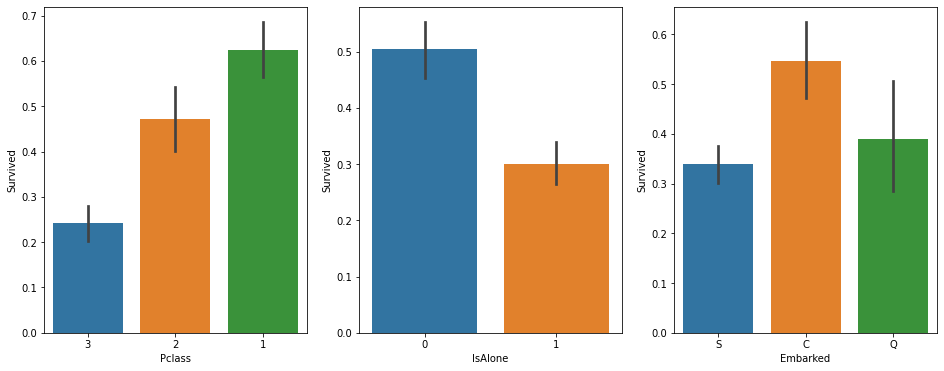

In [15]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.barplot(x='Pclass', y='Survived', data=df, order=[3,2,1], ax=ax[0])
sns.barplot(x='IsAlone', y='Survived', data=df, order=[0,1], ax=ax[1])
sns.barplot(x='Embarked', y='Survived', data=df, ax=ax[2])

It is once again proven that higher Pclass/Fare led to higher chance of survival. Also, people who are alone or people who embark to C is more likely to survive.

male      575
female    313
Name: Sex, dtype: int64


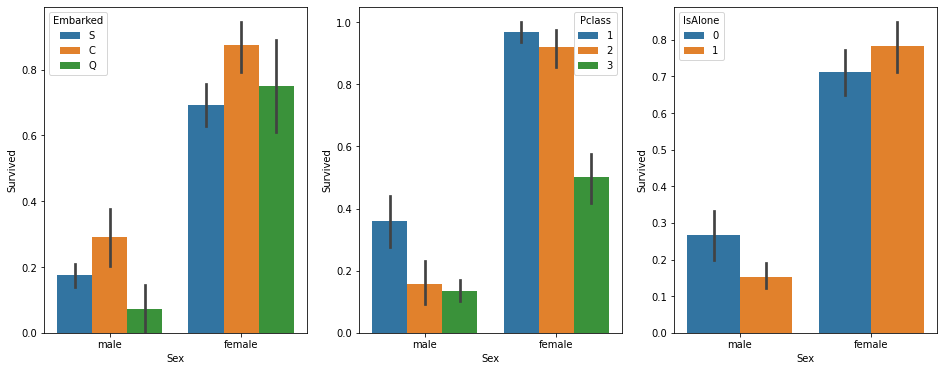

In [16]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ax=ax[0])
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, ax=ax[1])
sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=df, ax=ax[2])
print(df['Sex'].value_counts())

Overall, female accounted for more survived people eventhough there are more men than women in the Titanic.

### 4. Machine Learning Modelling 

In [35]:
# Machine learning module
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

**4.1 Select the best algorithm**

In [18]:
# Machine learning method for classification
MLA = [
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost
    XGBClassifier()]

# We'll use shuffle split to split the dataset for cross validation
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
cv_split = ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=0)
# Intentionally leaving out 10% of the dataset

# Create table to compare MLA metrics
MLA_compare = pd.DataFrame(columns=['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean',
                                    'MLA Test Accuracy 3*STD' , 'MLA Time'])

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation
    cv_results = cross_validate(alg, df[df_x_bin], df[Target], cv=cv_split, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    row_index += 1

MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare.head()

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.836466,0.835206,0.0440931,0.0862301
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834398,0.834082,0.0457925,0.0915459
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890602,0.829588,0.0517952,0.20766
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.865038,0.828839,0.0382848,0.235623
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.896241,0.82397,0.0529403,0.303446


Text(0, 0.5, '')

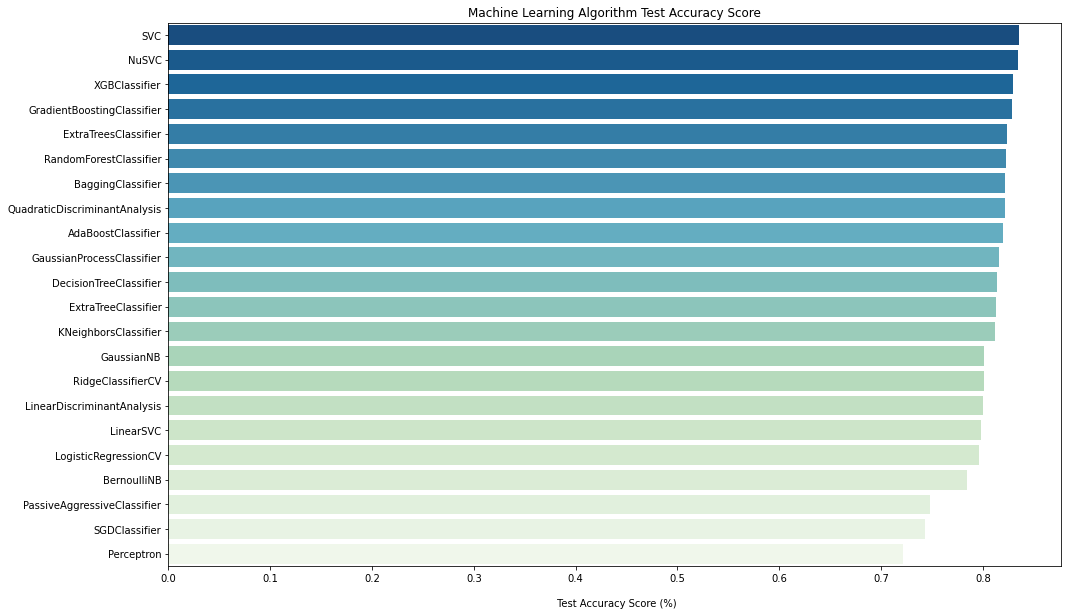

In [26]:
plt.figure(figsize=(16,10))
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, palette='GnBu_r')
plt.title('Machine Learning Algorithm Test Accuracy Score')
plt.xlabel('\n Test Accuracy Score (%)')
plt.ylabel('')

Let's try to optimize SVC score using parameter tuning

**4.2 SVC (Support Vector Classifier) Parameter Tuning with GridSearchCV**

In [25]:
# Before tuning
svc = svm.SVC(probability=True, random_state=0)
svc_result = cross_validate(svc, df[df_x_bin], df[Target], cv=cv_split, return_train_score=True)
svc.fit(df[df_x_bin], df[Target])

print('BEFORE SVC Parameters: ', svc.get_params(), '\n')
print("BEFORE SVC Training w/bin score mean: {:.2f}". format(svc_result['train_score'].mean()*100)) 
print("BEFORE SVC Test w/bin score mean: {:.2f}". format(svc_result['test_score'].mean()*100))
print("BEFORE SVC Test w/bin score 3*std: +/- {:.2f} \n". format(svc_result['test_score'].std()*100*3))

# Parameter to tune
# Ref: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
param_grid_svc = {'C':[1,10,100], 'gamma':[1,0.1,0.001]}

# Tune model
tune_svc = GridSearchCV(svm.SVC(random_state=0, probability=True), param_grid=param_grid_svc, scoring='roc_auc', cv=cv_split, return_train_score=True)
tune_svc.fit(df[df_x_bin], df[Target])

print('AFTER SVC Parameters: ', tune_svc.best_params_)
print("AFTER SVC Training w/bin score mean: {:.2f}". format(tune_svc.cv_results_['mean_train_score'][tune_svc.best_index_]*100)) 
print("AFTER SVC Test w/bin score mean: {:.2f}". format(tune_svc.cv_results_['mean_test_score'][tune_svc.best_index_]*100))
print("AFTER SVC Test w/bin score 3*std: +/- {:.2f}". format(tune_svc.cv_results_['std_test_score'][tune_svc.best_index_]*100*3))

BEFORE SVC Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

BEFORE SVC Training w/bin score mean: 83.65
BEFORE SVC Test w/bin score mean: 83.52
BEFORE SVC Test w/bin score 3*std: +/- 4.41 

AFTER SVC Parameters:  {'C': 10, 'gamma': 0.001}
AFTER SVC Training w/bin score mean: 86.53
AFTER SVC Test w/bin score mean: 86.64
AFTER SVC Test w/bin score 3*std: +/- 6.59


### Ready to Submit!

In [36]:
test_df['Survived'] = tune_svc.predict(test_df[df_x_bin])
print('Test Data Distribution: \n', test_df['Survived'].value_counts(normalize=True), '\n')

submit = test_df[['PassengerId', 'Survived']]
submit.to_csv('submit.csv', index=False)
submit.sample(5)

Test Data Distribution: 
 0    0.641148
1    0.358852
Name: Survived, dtype: float64 



,PassengerId,Survived
86,978,1
254,1146,0
181,1073,0
77,969,1
334,1226,0
